#### This notebook is used for reading in the data using the correct encoding, removing headers and footers, renaming columns, choosing the correct column types and saving the cleaned data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### construction cost data

In [2]:
construction_cost = pd.read_csv('../data/baukosten.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
construction_cost.columns = ['year', 'total cost', 'material cost', 'labor cost']
construction_cost = construction_cost.set_index('year')
construction_cost.head()

<ipython-input-2-c69c8219be56>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  construction_cost = pd.read_csv('../data/baukosten.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


,total cost,material cost,labor cost
year,,,
2000,76.4,75.8,77.3
2001,76.9,75.5,78.9
2002,77.6,75.5,80.8
2003,78.5,75.7,82.7
2004,80.6,79.2,82.8


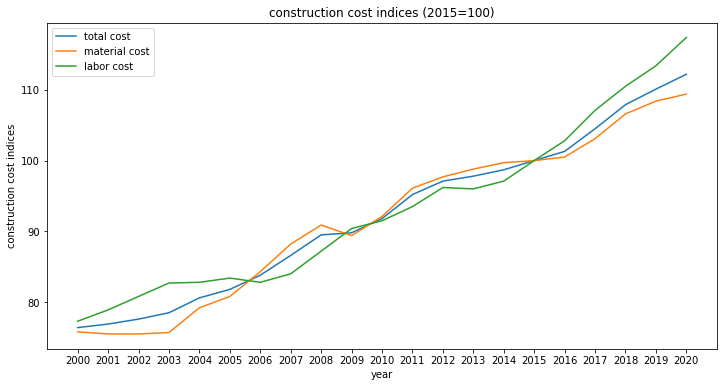

In [3]:
plt.figure(figsize=(12, 6))

for column in construction_cost.columns:

    plt.plot(construction_cost.index, construction_cost[column], label=column)

plt.legend()
plt.xlabel('year')
plt.ylabel('construction cost indices')
plt.xticks(construction_cost.index.to_list())
plt.title('construction cost indices (2015=100)');

In [4]:
construction_cost.to_csv('../data/construction_cost.csv')

#### living space data

In [5]:
housing = pd.read_csv('../data/wohnungsbestand.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
# we are only interested in the total living space in qm
housing = housing.iloc[:, [0, 1, -1]]
housing.columns = ['year', 'federal state', 'living space']
# only select year
housing.year = pd.to_datetime(housing.year, format='%d.%m.%Y').dt.year
housing.head()

<ipython-input-5-5717bb113fe0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  housing = pd.read_csv('../data/wohnungsbestand.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


,year,federal state,living space
0,1995,Baden-Württemberg,383676
1,1995,Bayern,458903
2,1995,Berlin,120471
3,1995,Brandenburg,78535
4,1995,Bremen,25043


compute living space indices (2015=100%), rearrange shape of dataframe

In [6]:
rearranged_housing = {}
rearranged_housing['year'] = housing['year'].unique()

fed_states = housing['federal state'].unique()

for fed_state in fed_states:
    state_mask = housing['federal state'] == fed_state
    year_mask = housing['year'] == 2015
    index_100 = housing[state_mask & year_mask]['living space'].item() / 100
    rearranged_housing[fed_state] = housing.loc[state_mask, 'living space'].divide(index_100, axis=0).values

housing = pd.DataFrame(rearranged_housing)
housing = housing.set_index('year')
housing = housing.rename(columns={"Insgesamt": "total"})
housing.head()

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,total
year,,,,,,,,,,,,,,,,,
1995,80.016684,78.100115,88.094507,72.905256,90.420999,82.938033,81.384211,77.015867,77.354369,80.787716,77.069752,86.144473,84.104135,87.127497,77.402455,85.772143,80.221092
1996,81.382288,79.452605,89.373464,75.275246,91.099798,83.822042,82.367904,78.848407,78.627098,81.846279,78.339161,87.329920,86.026239,88.638973,78.665743,87.143737,81.519912
1997,82.647994,80.749103,91.164297,77.920945,91.641392,84.649718,83.567161,81.216101,80.028732,82.886814,79.701560,88.367430,88.275161,90.428984,80.079803,88.988368,82.901301
1998,83.904733,82.051557,92.185855,80.436680,92.211872,85.506283,84.729413,83.090586,81.349865,83.939582,80.911398,89.393261,89.827540,91.862589,81.516707,90.355642,84.171028
1999,85.140200,83.385326,92.979993,82.652569,92.890670,86.199624,85.911784,84.865271,82.907063,85.063952,82.241832,90.331497,91.128340,93.137460,82.928482,91.559837,85.447210


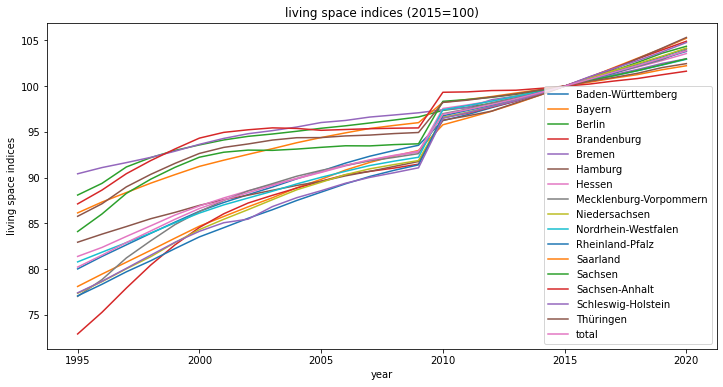

In [7]:
plt.figure(figsize=(12, 6))

for column in housing.columns:

    plt.plot(housing.index, housing[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('living space indices')
plt.title('living space indices (2015=100)');

In [8]:
housing.to_csv('../data/living_space.csv')

#### rent data

In [9]:
rent = pd.read_csv('../data/mieten.csv', encoding = 'latin1', sep=';', decimal=',', header=11, skipfooter=3)
rent.columns = ['year', 'rent']
rent = rent.set_index('year')
rent.head()

<ipython-input-9-f81462344c73>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  rent = pd.read_csv('../data/mieten.csv', encoding = 'latin1', sep=';', decimal=',', header=11, skipfooter=3)


,rent
year,
1995,76.7
1996,79.2
1997,81.2
1998,82.2
1999,82.9


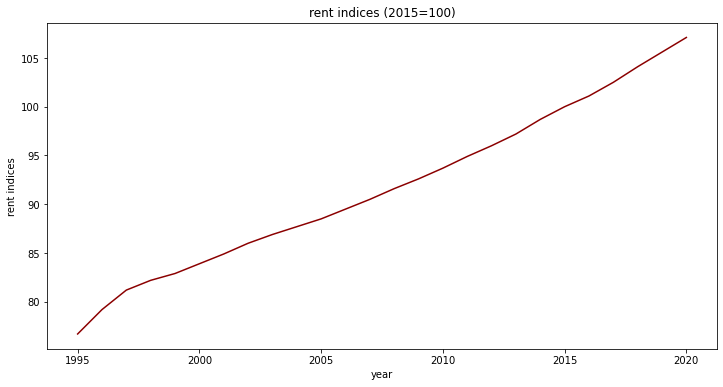

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(rent.index, rent['rent'], color='darkred')
    
plt.xlabel('year')
plt.ylabel('rent indices')
plt.title('rent indices (2015=100)');

In [35]:
rent.to_csv('../data/rent.csv')

#### rent data per federal state

In [23]:
fs_rent = pd.read_csv('../data/mieten_bundesland.csv', encoding = 'latin1', sep=';', decimal=',', header=4, skipfooter=3)
fs_rent = fs_rent.rename(columns={fs_rent.columns[0]: "year"})
fs_rent = fs_rent.set_index('year')
fs_rent.head()

<ipython-input-23-a208c10b0cdc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  fs_rent = pd.read_csv('../data/mieten_bundesland.csv', encoding = 'latin1', sep=';', decimal=',', header=4, skipfooter=3)


,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
year,,,,,,,,,,,,,,,,
2005,86.9,85.3,85.8,94.9,82.0,-,87.7,94.6,89.4,88.3,90.2,93.5,96.5,93.9,-,92.8
2006,88.1,87.0,87.0,95.4,83.5,-,88.7,94.8,90.0,89.2,90.8,94.3,96.7,94.1,-,93.2
2007,89.5,88.6,87.2,95.8,84.0,-,89.7,95.1,91.0,90.0,91.7,95.1,97.0,94.7,-,93.8
2008,91.1,90.2,89.1,96.1,85.2,-,91.0,95.7,92.0,90.8,92.9,95.6,97.1,95.3,-,95.6
2009,92.2,91.7,90.7,96.3,86.6,-,92.2,96.4,92.8,91.7,93.6,95.8,97.5,96.0,-,95.8


take mean over years 2005 - 2014 and fill in the missing values for Hamburg and Schleswig-Holstein

In [24]:
correct_cols = (fs_rent.columns != 'Hamburg') & (fs_rent.columns != 'Schleswig-Holstein')
fs_rent_mean = fs_rent.loc[:2014, correct_cols].mean(axis=1).values
fs_rent.loc[:2014, ['Hamburg', 'Schleswig-Holstein']] = fs_rent_mean.reshape(-1, 1).repeat(2, axis=1)
fs_rent.head()

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
year,,,,,,,,,,,,,,,,
2005,86.9,85.3,85.8,94.9,82.0,90.128571,87.7,94.6,89.4,88.3,90.2,93.5,96.5,93.9,90.128571,92.8
2006,88.1,87.0,87.0,95.4,83.5,90.914286,88.7,94.8,90.0,89.2,90.8,94.3,96.7,94.1,90.914286,93.2
2007,89.5,88.6,87.2,95.8,84.0,91.657143,89.7,95.1,91.0,90.0,91.7,95.1,97.0,94.7,91.657143,93.8
2008,91.1,90.2,89.1,96.1,85.2,92.692857,91.0,95.7,92.0,90.8,92.9,95.6,97.1,95.3,92.692857,95.6
2009,92.2,91.7,90.7,96.3,86.6,93.521429,92.2,96.4,92.8,91.7,93.6,95.8,97.5,96.0,93.521429,95.8


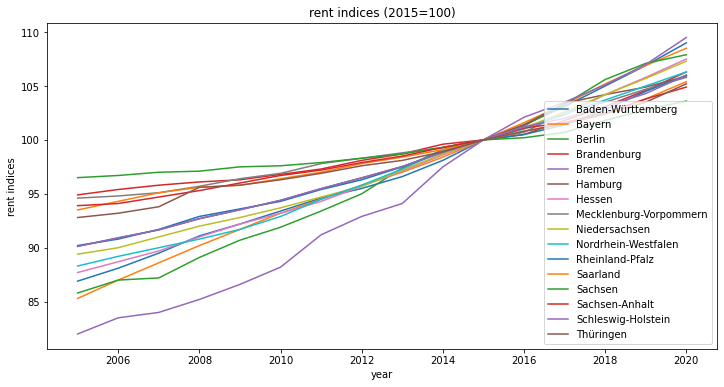

In [25]:
plt.figure(figsize=(12, 6))

for column in fs_rent.columns:

    plt.plot(fs_rent.index, fs_rent[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('rent indices')
plt.title('rent indices (2015=100)');

In [26]:
fs_rent.to_csv('../data/rent_federal_states.csv')

#### population data

In [27]:
population = pd.read_csv('../data/bevoelkerung.csv', encoding = 'latin1', sep=';', decimal=',', header=5, skipfooter=4)
population = population.rename(columns={population.columns[0]: "year"})
# only select year
population.year = pd.to_datetime(population.year, format='%d.%m.%Y').dt.year
population = population.set_index('year')
population['total'] = population.sum(axis=1)
population.head()

<ipython-input-27-6528860250e4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  population = pd.read_csv('../data/bevoelkerung.csv', encoding = 'latin1', sep=';', decimal=',', header=5, skipfooter=4)


,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,total
year,,,,,,,,,,,,,,,,,
1995,10319367,11993484,3471418,2542042,679757,1707901,6009913,1823084,7780422,17893045,3977919,1084370,4566603,2738928,2725461,2503785,81817499
1996,10374505,12043869,3458763,2554441,677770,1707986,6027284,1817196,7815148,17947715,4000567,1084184,4545702,2723620,2742293,2491119,82012162
1997,10396610,12066375,3425759,2573291,673883,1704731,6031705,1807799,7845398,17974487,4017828,1080790,4522412,2701690,2756473,2478148,82057379
1998,10426040,12086548,3398822,2590375,667965,1700089,6035137,1798689,7865840,17975516,4024969,1074223,4489415,2674490,2766057,2462836,82037011
1999,10475932,12154967,3386667,2601207,663065,1704735,6051966,1789322,7898760,17999800,4030773,1071501,4459686,2648737,2777275,2449082,82163475


compute population indices (2015 = 100%)

In [28]:
index_100 = population.loc[2015].values / 100
population = population.apply(lambda x: x/index_100, axis=1)

population.head()

,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,total
year,,,,,,,,,,,,,,,,,
1995,94.850453,93.381640,98.618961,102.302616,101.231293,95.551827,97.308057,113.069149,98.155867,100.154090,98.152291,108.916560,111.793625,121.975711,95.338708,115.343845,99.564123
1996,95.357254,93.773939,98.259447,102.801605,100.935384,95.556582,97.589316,112.703971,98.593962,100.460099,98.711114,108.897877,111.281954,121.293983,95.927504,114.760351,99.801009
1997,95.560432,93.949172,97.321842,103.560209,100.356521,95.374475,97.660897,112.121161,98.975588,100.609952,99.137017,108.556976,110.711798,120.317350,96.423532,114.162805,99.856034
1998,95.830938,94.106239,96.556593,104.247742,99.475196,95.114770,97.716466,111.556152,99.233480,100.615711,99.313216,107.897372,109.904009,119.106022,96.758787,113.457415,99.831248
1999,96.289520,94.638952,96.211283,104.683668,98.745475,95.374699,97.988948,110.975203,99.648790,100.751638,99.456426,107.623968,109.176222,117.959136,97.151202,112.823799,99.985143


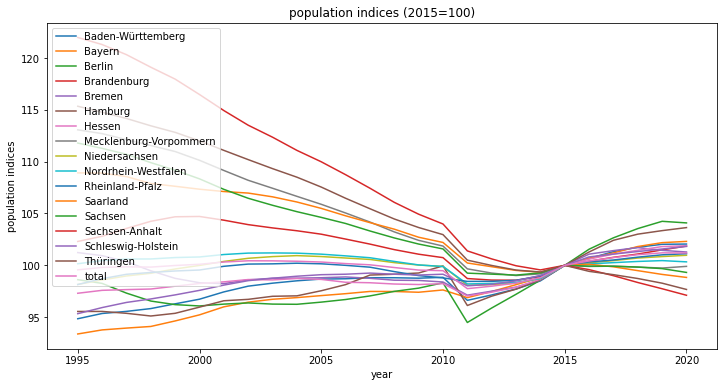

In [29]:
plt.figure(figsize=(12, 6))

for column in population.columns:

    plt.plot(population.index, population[column], label=column)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('population indices')
plt.title('population indices (2015=100)');

In [30]:
population.to_csv('../data/population.csv')

#### net income data

In [31]:
income = pd.read_csv('../data/einkommen.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
# only select income for all types of employment
income = income.iloc[:, [0, 1, -1]]
income = income[income.iloc[:, 1].str.startswith('Netto')].iloc[:, [0, 2]]
income.columns = ['year', 'income']
income = income.set_index('year')

<ipython-input-31-f0e1158cd1d0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  income = pd.read_csv('../data/einkommen.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)


compute net income indices (2015 = 100%)

In [32]:
index_100 = income.loc[2015].item() / 100
income.loc[:, 'income'] = income['income'].divide(index_100, axis=0).values

income.head()

,income
year,
2008,89.689349
2009,91.464497
2010,92.174556
2011,93.949704
2012,96.104536


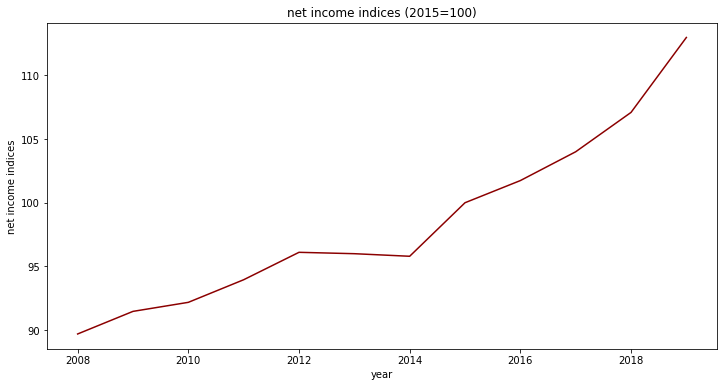

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(income.index, income['income'], color='darkred')
plt.xlabel('year')
plt.ylabel('net income indices')
plt.title('net income indices (2015=100)');

In [34]:
income.to_csv('../data/income.csv')